In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import parameters as p
import pickle
%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

/tmp/ipykernel_66792/3144901383.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Cargado de datos

In [2]:
''' PARÁMETROS '''

INPUT_FOLDER = os.path.abspath("input")
CICLO = 9
SECTORES = [5, 6]

folder_ciclo = os.path.join(INPUT_FOLDER, f"ciclo_{CICLO}")

In [3]:
''' DESCARGAS '''
suffix_input = '_'.join([str(s) for s in SECTORES])
df_descargas = pd.read_csv(os.path.join(folder_ciclo, "input_sectores_{}.csv".format(suffix_input)), parse_dates=['fecha'])

In [4]:
''' RUTAS '''
ruta_topografia = os.path.join(folder_ciclo, "DEM_04.02.2023_10x10m.asc")
ruta_mascara_tranque = p.RUTA_MASK_TRANQUE
ruta_sector_5 = os.path.join(folder_ciclo, "poligono_sector_5.csv")
ruta_interior = os.path.join(folder_ciclo, "zona_interior_sector_5.csv")
ruta_extension_sector_5 = os.path.join(folder_ciclo, "extension_sector_5.csv")

In [5]:
''' MALLADO '''
res_region = 1024
res_interior = res_region / 2

# Construcción input

In [6]:
df_input = df_descargas[df_descargas.sector == 5]
df_input = df_input[df_input.fecha == df_input.fecha.min()]

In [7]:
# resoluciones_region = [2**x for x in range(7, 11)]

# Ejecución simulación

In [8]:
from simulador import AnugaSW

simulador = AnugaSW(ruta_topografia,
                    ruta_mascara_tranque,
                    ruta_sector_5, ruta_interior,
                    ruta_extension_sector_5,
                    res_region=res_region,
                    res_interior=res_interior)


Figure files for each frame will be stored in figuras


In [9]:
df_input

,fecha,sector,id_punto,coordenada_x,coordenada_y,angulo_polar,tms,tasa_diaria,radio_canaleta
153,2023-03-02,5,29,489215.492474,7.297292e+06,2.425051,22137.258627,0.961598,1.6345
154,2023-03-02,5,32,489082.721325,7.296706e+06,2.536601,22137.258627,0.961598,1.4370
155,2023-03-02,5,33,488926.557163,7.296312e+06,2.907850,22137.258627,0.961598,1.6430
156,2023-03-02,5,37,488770.083732,7.295805e+06,2.377836,44274.517254,1.923196,1.3145


In [10]:
simulador.ejecutar(df_input)

Time = 0.0000 (sec), steps=0 (1s)
Distancias a los bordes: {0: inf, 1: inf}



/home/jorge-ovalle/anuga_core/anuga_jorge/estado.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self._df_estado = pd.concat([self._df_estado, df_aux], ignore_index=True)


Time = 400.0000 (sec), delta t = 1000.00000000 (s), steps=1 (0s)
Distancias a los bordes: {0: 479.092154173782, 1: 852.4007012872297}

Time = 800.0000 (sec), delta t in [0.78586877, 3.18307476] (s), steps=159 (1s)
Distancias a los bordes: {0: 386.93293070602186, 1: 593.0015313710309}

Time = 1200.0000 (sec), delta t in [2.69680622, 3.13931418] (s), steps=145 (1s)
Distancias a los bordes: {0: 377.32401928025456, 1: 418.3797022133377}

Time = 1600.0000 (sec), delta t in [2.78775210, 2.82488639] (s), steps=143 (1s)
Distancias a los bordes: {0: 377.32401928025456, 1: 300.05689194916465}

Time = 2000.0000 (sec), delta t in [2.82490081, 2.82885167] (s), steps=142 (1s)
Distancias a los bordes: {0: 377.32401928025456, 1: 245.28411967664024}

Time = 2400.0000 (sec), delta t in [2.82885330, 2.82904220] (s), steps=142 (1s)
Distancias a los bordes: {0: 377.32401928025456, 1: 215.8905631259412}

Time = 2800.0000 (sec), delta t in [2.82900512, 2.82905956] (s), steps=142 (1s)
Distancias a los bordes:

In [11]:
# columns = ['tiempo_sim', 'tiempo_inicio_paso', 'elapsed']
# df = pd.DataFrame(columns=['tiempo_sim', 'tiempo_inicio_paso',
#                                                 'elapsed'])

# df1 = pd.concat([df, pd.DataFrame(data = [[0,0,1]], columns=columns)], axis=0)



# arr = simulador.domain.quantities['elevation'].save_to_array(cellsize=10,
#                                                    easting_min=simulador.topografia.dem.columns.min(),
#                                                    northing_min=simulador.topografia.dem.index.min(),
#                                                    easting_max=simulador.topografia.dem.columns.max(),
#                                                    northing_max=simulador.topografia.dem.index.max())

# Debugging

## Guardado

In [70]:
# DEBUGGING 

from copy import deepcopy
# centroides_old = simulador.centroides_old
# centroides_new = simulador.centroides_new
# stage_old = simulador.stage_old
# stage_new = simulador.stage_new
# triang_old = simulador.triang_old
# triang_new = simulador.triang_new
dominio_old = deepcopy(simulador.dominio_old)
dominio_new = deepcopy(simulador.dominio_new)
dplotter_old = deepcopy(simulador.dplotter_old)
dplotter_new = deepcopy(simulador.dplotter_new)

In [16]:
# Guardamos los datos en formato pickle
# with open('debugging.pkl', 'wb') as f:
#     pickle.dump([dominio_old, dominio_new, dplotter_old, dplotter_new], f)

## Cargado

In [17]:
# Cargamos los datos en formato pickle
# with open('debugging.pkl', 'rb') as f:
#     centroides_old, centroides_new, stage_old, stage_new, triang_old, triang_new = pickle.load(f)

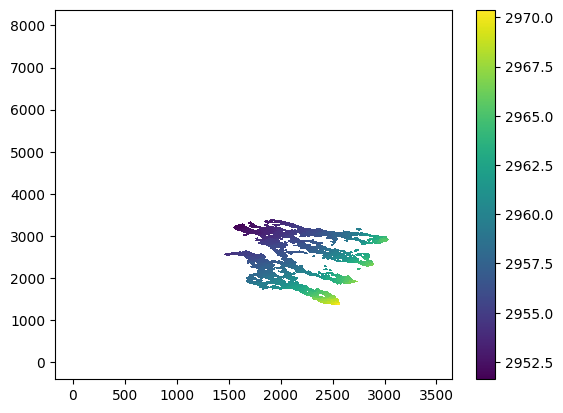

In [43]:
stage_old = dominio_old.quantities['stage'].centroid_values
plt.tripcolor(dplotter_old.triang, stage_old, cmap='viridis')
plt.colorbar()

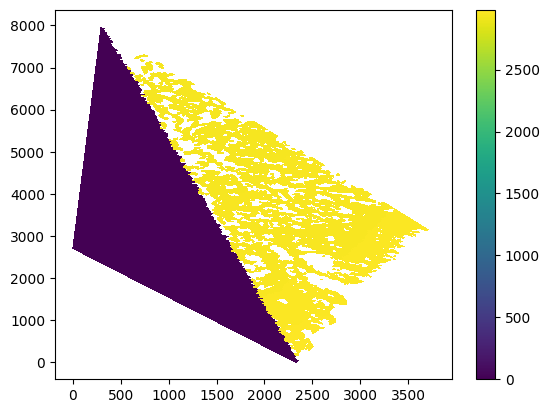

In [75]:
stage_new = dominio_new.quantities['stage'].centroid_values
plt.tripcolor(dplotter_new.triang, stage_new, cmap='viridis')
plt.colorbar()


In [73]:
for i in range(stage_new.shape[0]):
    if np.isinf(stage_new[i]) or np.isnan(stage_new[i]):
        stage_new[i] = 0


In [74]:
(~((stage_new < 0) | (stage_new >= 0))).sum()

0

In [26]:
from copy import deepcopy
hola = deepcopy(simulador.stage_new)

In [16]:
print('Nans:', np.isnan(stage_old).sum())
print('Inf:', np.isinf(stage_old).sum())

Nans: 0
Inf: 0


In [17]:
print('Nans:', np.isnan(stage_new).sum())
print('Inf:', np.isinf(stage_new).sum())

Nans: 370
Inf: 9663


In [64]:
aux_stage = dominio_new.quantities['stage'].get_values(interpolation_points=dominio_old.get_centroid_coordinates(absolute=True))

In [65]:
# dominio_old.set_quantity('stage', numeric=aux_stage, location='centroids')

stage_old = dominio_old.quantities['stage'].centroid_values

In [66]:
(aux_stage != stage_old).sum()

18213

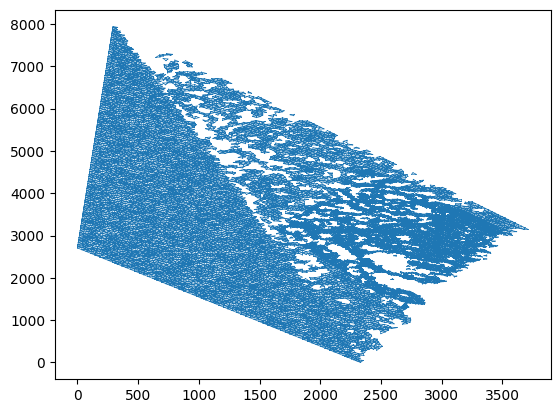

In [69]:
plt.triplot(dplotter_new.triang, linewidth=0.5)

In [96]:
from shapely import Polygon

# Creamos un polígono con las coordenadas de los centroides
poligono1 = Polygon(simulador.domain.get_vertex_coordinates(triangle_id=0))
poligono2 = Polygon(simulador.domain.get_vertex_coordinates(triangle_id=1))

In [95]:
simulador.domain.areas

array([824.19862193, 275.83180723, 727.26806099, ..., 517.4030943 ,
       479.29731789, 391.3754843 ])

In [97]:
inter = poligono1.intersection(poligono2)

In [98]:
inter.area

0.0